<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/wide_and_deep_with_subclassing_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# content

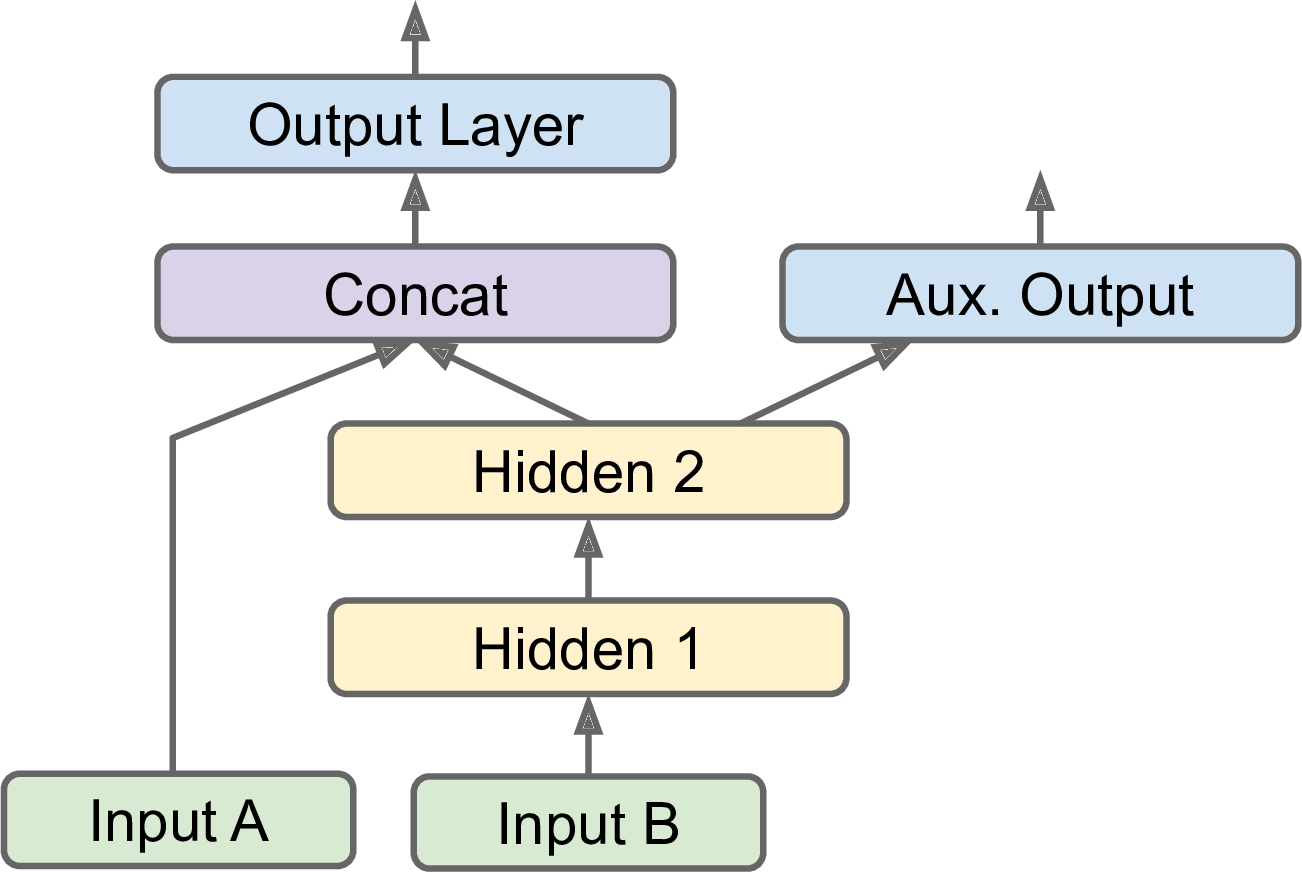

In [6]:
from IPython.display import Image
Image('/content/mls2_1016.png', width=600)

# import

In [7]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

# dataset
from sklearn.datasets import fetch_california_housing

# model
from keras import Model
# layer
from keras.layers import Input, Dense, Concatenate
# activation
from keras.activations import relu
# optimization
from keras.optimizers import adam
# loss
from keras.losses import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.2.0
2.3.0-tf


Using TensorFlow backend.


# load the data

In [8]:
dataset = fetch_california_housing()

In [9]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [0]:
X = dataset.data
y = dataset.target

# split the data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

# data preparation

In [0]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test[:3, :5], X_test[:3, 2:]

# build the ann model using subclassing api

In [0]:
class WideAndDeepModel(Model):
  def __init__(self, units=30, activation=relu, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = Dense(units=units, activation=activation)
    self.hidden2 = Dense(units=units, activation=activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)

  def call(self, input):
    input_A, input_B = input
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    aux_output = self.aux_output(hidden2)
    concat = Concatenate()([input_A, hidden2])
    main_output = self.main_output(concat)
    return main_output, aux_output

In [0]:
model = WideAndDeepModel()

# compile

In [0]:
model.compile(optimizer='adam', loss=[mean_squared_error, mean_squared_error], loss_weights=[0.9, 0.1])

# train

In [25]:
history = model.fit([X_train_A, X_train_B],
                    [y_train, y_train],
                    batch_size=100,
                    epochs=10,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
                    )

Train on 14448 samples, validate on 6192 samples
Epoch 1/10
14448/14448 [==============================] - 1s 41us/step - loss: 2.3932 - output_1_loss: 2.3486 - output_2_loss: 2.7562 - val_loss: 1.2316 - val_output_1_loss: 1.2114 - val_output_2_loss: 1.4132
Epoch 2/10
14448/14448 [==============================] - 0s 18us/step - loss: 0.9843 - output_1_loss: 0.9723 - output_2_loss: 1.0859 - val_loss: 0.7586 - val_output_1_loss: 0.7517 - val_output_2_loss: 0.8206
Epoch 3/10
14448/14448 [==============================] - 0s 18us/step - loss: 0.6840 - output_1_loss: 0.6769 - output_2_loss: 0.7476 - val_loss: 0.5844 - val_output_1_loss: 0.5781 - val_output_2_loss: 0.6405
Epoch 4/10
14448/14448 [==============================] - 0s 18us/step - loss: 0.5661 - output_1_loss: 0.5593 - output_2_loss: 0.6282 - val_loss: 0.5148 - val_output_1_loss: 0.5076 - val_output_2_loss: 0.5797
Epoch 5/10
14448/14448 [==============================] - 0s 18us/step - loss: 0.5131 - output_1_loss: 0.5047 - out

# evaluate

In [26]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])

6192/6192 [==============================] - 0s 23us/step


[0.3965100251735027, 0.3864307105541229, 0.4803713858127594]